<h1>Assignment 1</h1>

Assignment 1 is all programming.  (Future assignments will have a theoretical component also.) Complete the tasks as specified throughout this Jupyter notebook file. Make your code as clear as possible. When you're done, select "Restart and run all" in the Kernel menu, and make sure your code produces the output you expect. At the due date, I will "collect" your current version of this file; you don't have to do anything.

Make sure the kernel you are running is "Python 3 (system-wide)". If you need any Python 3 syntax that you don't know, Google usually suffices. Be aware that Python 2 syntax is different in some ways. To run the code in a particular section, press <tt>shift+return</tt> while that section is selected.

The marking of programming assignments will be largely automated, and there is no partial credit for incorrect output. (There generally is not time for me or the marker to read the code you submit, but commenting your code is still a good habit.) If you are asked to write a function that performs a certain calculation, my marking script will run that function using various inputs to see whether it gives the right outputs. When possible I will test different sorts of inputs, so that if your code works only in certain cases you will at least get some credit.

It is a good idea to test your own code's correctness, often by writing other test code. You are encouraged to check your code's output with that of other students. An acceptable level of collaboration would be sitting next to each other and each working on your own code. In such cases, it is fine to look at and discuss each other's code, but do not work together on a single piece of code and then submit the same assignment. Plagiarism detection is automated, based on the content and (if incorrect) the output of your code. Of course in some cases it is expected that people will write similar or even identical code independently; this is fine.


<h2>1. Evaluating a polynomial</h2>

The set of univariate polynomials with degree $\le n$ is a vector space of dimension $n+1$. We need $n+1$ numbers to represent a particular polynomial in this set. One way to represent a polynomial on a computer is to consider it in the monomial basis,
$$c_0 + c_1x + c_2x^2 + \cdots + c_nx^n,$$
and store a vector of the coefficients $c_0,\ldots,c_n$. It turns out that using the monomial basis is a pretty bad idea, but it will work for low-degree polynomials. Let's store the $c_i$ in a NumPy array. You don't need to know much about NumPy for this, but <a href="https://docs.scipy.org/doc/numpy/user/quickstart.html">here is a tutorial</a>. First we import the NumPy module and call it <tt>np</tt> for short. (To make this happen, select the following section and press <tt>shift+return</tt>.)

In [1]:
import numpy as np

For instance, consider the polynomial $p(x)=2+3x-7x^2+x^5$. Let's define the numpy array <tt>pc</tt> to store its coefficients.

In [2]:
pc = np.array([2,3,-7,0,0,1])

Indices in a NumPy array can be specified in various ways. This syntax is very useful, and you should learn it. Here are some examples:

In [3]:
print( pc )
print( pc[0] )
print( pc[-1] )
print( pc[0:2] )
print( pc[1:] )
print( pc[1:-1] )
print( pc[0::2] )
print( pc[:0:-2] )

[ 2  3 -7  0  0  1]
2
1
[2 3]
[ 3 -7  0  0  1]
[ 3 -7  0  0]
[ 2 -7  0]
[1 0 3]


<h4>a.</h4>
Complete the following function that will evaluate an arbitray polynomial (specified by its coefficient array) at an arbitrary point $x$. Recall that exponentiation in Python is done with <tt>**</tt>.

In [4]:
def poly_eval_monom(x,c):
#     x is the point at which you want to evaluate the polynomial
#     c is a numpy array of coefficients, [c0,c1,...,cn]
    out = c[0]
    for i in range(1,len(c)):
        
        # Your code here
        out+=c[i]*(x**i)
       
    return out

The correctness of the above function will be tesed by a marking script, so it's a good idea to test it yourself in various cases. For instance, if you wanted to evaluate $p(2)$ for the example polynmial given above, you could run this:

In [5]:
poly_eval_monom(2,pc)

12

<h4>b.</h4>
Let $f(x)=\cos(\pi x/2)$. To plot this function, let's make an array of $x$ values and an array of corresponding $f$ values. We will plot these points with straight lines connecting them, so we want a lot of points. Let's use 200 point on the interval $[-5,5]$.

In [6]:
x_f_plot = np.linspace(-5,5,200)
y_f_plot = np.cos(np.pi/2*x_f_plot);

For plotting, we will use the <tt>pyplot</tt> part of the <tt>Matplotlib</tt> module. Like so:

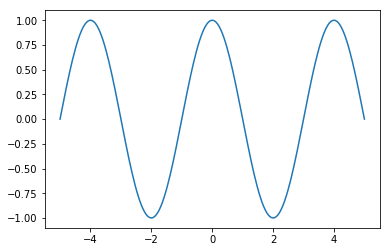

In [7]:
import matplotlib.pyplot as plt
plt.plot(x_f_plot,y_f_plot);


Let $p_2(x)$ be the polynomial that interpolates $\cos (\pi x/2)$ at $x_0=-1$, $x_1=0$, and $x_2=1$. By hand, find $p_2$ in the monomial basis. Complete the following line to define the array <tt>[c0,c1,c2]</tt>.

In [8]:
x_arr  = np.array([-1, 0, 1] )
p2_cos = np.array(np.cos(np.pi/2*x_arr))


Define arrays of points that you can use to plot $p_2(x)$. Use your <tt>poly_eval_monom</tt> function.

In [9]:
x_p_plot = np.linspace(-2,2,200)
y_p_plot= np.array([poly_eval_monom(x, p2_cos) for x in x_p_plot ])

# write code to define the y_p_plot array, containing p2(x) values corresponding to x_p_plot

Run the following code to produce the plot. Here the <tt>scatter</tt> command is used to plot additional symbols at the interpolation points.

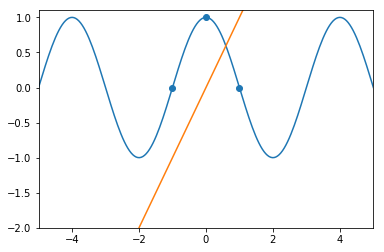

In [10]:
plt.plot(x_f_plot,y_f_plot)
plt.plot(x_p_plot,y_p_plot)

xi = np.array([-1,0,1])
yi = np.cos(np.pi/2*xi)
plt.scatter(xi,yi);

plt.axis([-5,5,-2,1.1]); # this sets the axes

<h2>2. Lagrange interpolation</h2>

<h4>a.</h4>

Write the following function so that it returns $P(x)$ at a specified value of $x$, where $P(x)$ is the polynomial that interpolates the points $(x_i,y_i)$ given by the NumPy arrays <tt>xi</tt> and <tt>yi</tt>. Do this by implementing the Lagrange construction of $P(x)$.

Write the function so that it can handle an input that is a NumPy array of $x$ values, in which case it will output the corresponging array of $P(x)$ values.

In [11]:
def lagrange_interp(x,xi,yi):
    # x is a number or a numpy array of values
    # xi is a numpy array of interpolation points, [x0,x1,...,xn]
    # yi is a numpy array of y values, [y0,y1,...,yn], at the interpolation points
    
    # Your code here
    p_y = []
   
    length = xi.shape[0]
    for x_val in x:
        ans = 0
        for i in range(length):
            t = yi[i]
            for j in range(length):
                if i!=j:
                    t*=(x_val-xi[j])/(xi[i]-xi[j])
            ans+=t
        p_y.append(ans)
    return np.array(p_y)

As a test of your <tt>lagrange_interp</tt> function, the following code should produce the same plot from the end of part 1b, comparing $\cos (\pi x/2)$ to its interpolating polynomial.

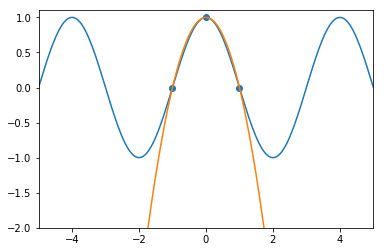

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x_f_plot,y_f_plot)

xi = np.array([-1,0,1])
yi = np.cos(np.pi/2*xi)
plt.scatter(xi,yi)

x_lag_plot = np.linspace(-2,2,200)
y_lag_plot = np.zeros(np.size(x_lag_plot))

y_lag_plot = lagrange_interp(x_lag_plot,xi,yi)
plt.plot(x_lag_plot,y_lag_plot)

plt.axis([-5,5,-2,1.1]);

<h4>b.</h4>


Let $f(x) = e^{-x^2}$. Let $x_0,\ldots,x_n$ be uniformly spaced on $[-2,2]$ with $x_0=-2$ and $x_n=2$. Plot $f(x)$ and the interpolating polynomial $P(x)$ over $x\in[-2.5,2.5]$ for $n=4$, 8, and 16. Make a separate plot for each $n$ value. Use your <tt>lagrange_interp</tt> function to compute values of $P(x)$ for the plots. Mark the interpolation points using <tt>scatter</tt> like in the preceding examples. Set the plot axes to $[-2.5,2.5]\times[-.2,1.1]$

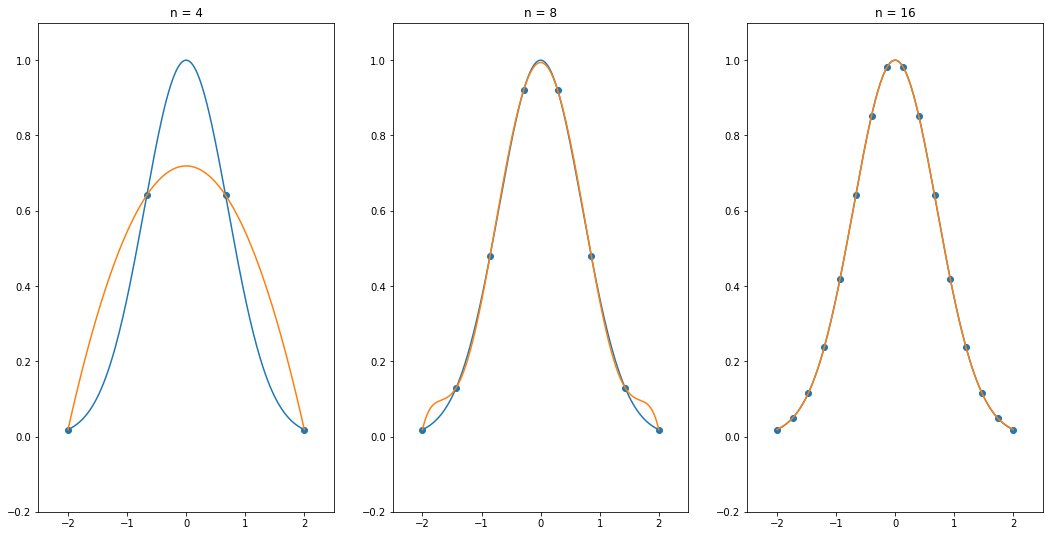

In [13]:
# Your code here
fig, axs = plt.subplots(1, 3, figsize=(18,9))
n = [4, 8 ,16]
for i in range(len(n)):
    x_plot = np.linspace(-2,2,200)
    y_plot = np.exp(-x_plot**2)
    axs[i].plot(x_plot, y_plot)
    xi= np.linspace(-2,2,n[i])
    yi= np.exp(-xi**2)

    axs[i].scatter(xi,yi)

    x_lag_plot = np.linspace(-2,2,200)
    y_lag_plot = np.zeros(np.size(x_lag_plot))

    y_lag_plot = lagrange_interp(x_lag_plot,xi,yi)
    axs[i].plot(x_lag_plot,y_lag_plot)
    axs[i].set_title("n = "+str(n[i]))
    axs[i].axis([-2.5,2.5,-0.2,1.1]);
    


<h4>c.</h4>

Repeat part 2b for $f(x)=\dfrac{1}{1+6x^2}$, except this time only plot for $x\in[-2,2]$ and let the plot axes be automatic. The interpolating polynomial might not approximate $f$ as well as it did in part 2b.

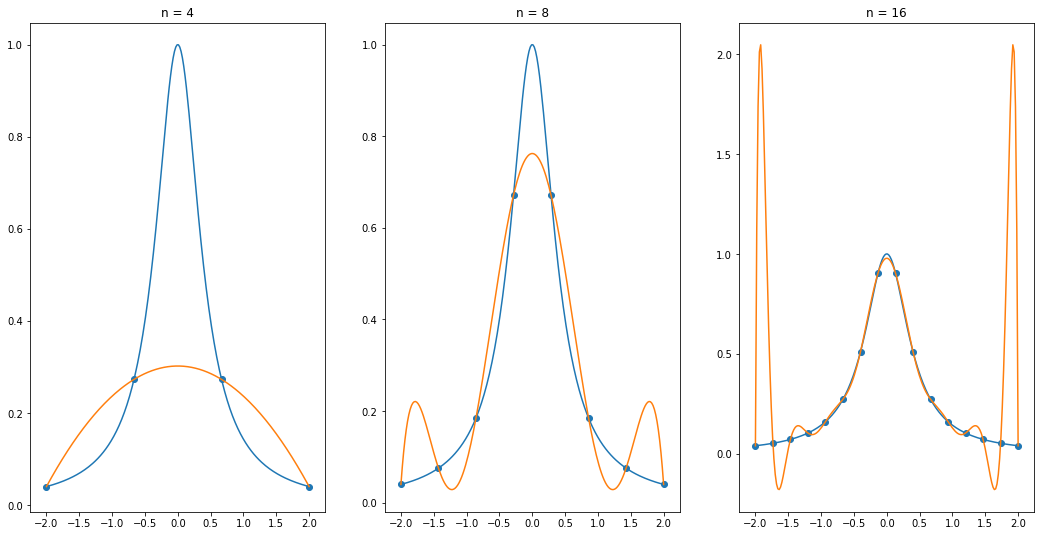

In [14]:
# Your code here
fig, axs = plt.subplots(1, 3, figsize=(18,9))
n = [4, 8 ,16]
for i in range(len(n)):
    x_plot = np.linspace(-2,2,200)
    y_plot = 1/(1+6*(x_plot**2))
    axs[i].plot(x_plot, y_plot)
    xi= np.linspace(-2,2,n[i])
    yi= 1/(1+6*(xi**2))

    axs[i].scatter(xi,yi)

    x_lag_plot = np.linspace(-2,2,200)
    y_lag_plot = np.zeros(np.size(x_lag_plot))

    y_lag_plot = lagrange_interp(x_lag_plot,xi,yi)
    axs[i].plot(x_lag_plot,y_lag_plot)
    axs[i].set_title("n = "+str(n[i]))
